In [104]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [105]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [106]:
X_test.shape

(10000, 32, 32, 3)

In [107]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [108]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [109]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [110]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [111]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index].item()])


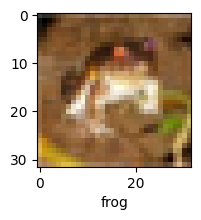

In [112]:
plot_sample(X_train, y_train, 0)

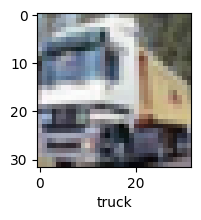

In [113]:
plot_sample(X_train, y_train, 1)

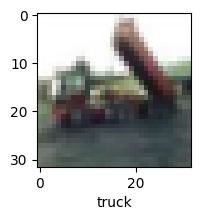

In [114]:
plot_sample(X_train, y_train, 2)

In [115]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [116]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
'''datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)'''

In [118]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

'''cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])'''

"cnn = models.Sequential([\n    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Conv2D(128, (3, 3), activation='relu'),\n\n    layers.Flatten(),\n    layers.Dense(128, activation='relu'),\n    layers.Dropout(0.5),\n    layers.Dense(10, activation='softmax')\n])"

In [119]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


'''cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=25)
'''


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3890 - loss: 1.6816
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6095 - loss: 1.1111
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6623 - loss: 0.9674
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6940 - loss: 0.8748
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7254 - loss: 0.7895
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7469 - loss: 0.7306
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7654 - loss: 0.6766
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7780 - loss: 0.6348
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8006 - loss: 0.5809
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8048 - loss: 0.5550


"cnn.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\ncnn.fit(X_train, y_train, epochs=25)\n"

In [120]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7028 - loss: 0.9261


[0.9256185293197632, 0.7069000005722046]

In [121]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[2.4998109e-04, 3.1925418e-04, 2.3321921e-03, 9.3884373e-01,
        6.1091654e-05, 5.7011481e-02, 8.1924070e-04, 5.6152730e-06,
        8.2770726e-05, 2.7471108e-04],
       [7.7805555e-05, 1.0263538e-03, 1.7570374e-08, 2.4804470e-09,
        1.1336634e-10, 4.8212889e-10, 9.1435462e-12, 8.2175176e-11,
        9.9877542e-01, 1.2041632e-04],
       [1.5359477e-03, 4.2194617e-03, 1.2589215e-05, 8.3480962e-05,
        1.1986826e-05, 1.1631634e-05, 1.3885048e-06, 1.6900347e-05,
        9.9263245e-01, 1.4741885e-03],
       [7.5043714e-01, 4.1555348e-04, 6.8906541e-03, 2.0884314e-04,
        7.7559979e-04, 4.5801471e-06, 6.5614581e-06, 1.1240556e-05,
        2.4120900e-01, 4.0736908e-05],
       [1.8852784e-07, 2.5524132e-05, 5.4578759e-02, 7.1575772e-03,
        8.5913378e-01, 4.9509696e-04, 7.8605630e-02, 7.8148062e-08,
        2.6448720e-06, 7.2619622e-07]], dtype=float32)

In [122]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]